# Employee Project - Group 23

##### By Tracy Gan, Aronn Laurel, Nikita Prabhu, Nolan Vu

# Introduction

Employee departure is a natural part of the workforce lifecycle. While some are involuntary due to terminations and layoffs, many employees also quit on their own accord. This is a concern to a company because recruiting, hiring and training employees take money, time and effort. As highlighted in studies on employee retention, several factors contribute to why employees leave, including financial incentives, career development opportunities, and supportive work environments. 

In our project, we want to explore why an employee might leave the company and focus on using quantifiable predictor variables to predict whether an employee will leave the company. These findings might be able to reduce workload on HR and keep employees longer in the company by ensuring their satisfaction with their job and the company.

### Data Description

We will work on the [Employee Dataset on Kaggle](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset) which came from the contributions of a HR department of a company, of which was anonymized. It contains information about the employees in the company, including their personal information such as age, gender, educational background, years of experience, salary tier, and the city where they work. The dataset also contains their information in regards to the company, such as the year they joined, and if they were ever benched. Using all of this information, we want to build a predictive model to predict whether or not an employee will leave the company. Moreover, getting to the details of our dataset, each variable is broken down into

| Variable Name     | Type of Variable | Description |
|-------------------|------------------|-------------|
| Education         | Categorical  | It represents the educational qualities of employees. There are three unique levels for this categorical variable, which are Bachelors, Masters, and PHD.   |
| JoiningYear       | Categorical  | It represents the year each employee joined the company, which also indicates the length of their service to the company.  |
| City              | Categorical  | It represents the city where the employee works at. There are three unique values for this categorical variable, which are Bangalore, Pune, New Delhi.      |
| PaymentTier         | Continuous  | The higher the PaymentTier, the higher the employee is getting paid.   |
| Age       | Continuous  | Employee Age  |
| Gender              | Categorical  | Employee Gender (Male/Female)  |
| EverBenched         | Categorical  | Whether an employee has ever been temporarily unassigned to work (Yes/No) |
| ExperienceInCurrentDomain       |  Continuous | Number of years of experience employees have in their current field |
| LeaveOrNot              | Categorical  | Our project's Target column, whether an employee will leave the company or not (0:Yes 1:No)     |

In total, there are 4653 rows of data for each column, where there are no missing values for any of the variables. 


# Exploratory Data Analysis (EDA)

In [37]:
# Firstly, we will load some libraries so that we can perform data analysis and visualisation to answer our question.
# Loading Libraries
library(tidyverse)
library(dplyr)
library(forcats)
library(ggplot2)
library(corrplot)
library(cowplot)
library(GGally)
library(glmbb)
library(broom)
library(latex2exp)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(modelr)
library(boot)
library(caret)

In [23]:
# Main developer:  Nikita
# Contributor: Aronn, Tracy, Nolan 

employee_data <- read_csv('data/Employee.csv')
head(employee_data,6)
cat("Number of NA values:", sum(is.na(employee_data)), "\n")

Rows: 4653 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Education, City, Gender, EverBenched
dbl (5): JoiningYear, PaymentTier, Age, ExperienceInCurrentDomain, LeaveOrNot

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bachelors,2017,Bangalore,3,34,Male,No,0,0
Bachelors,2013,Pune,1,28,Female,No,3,1
Bachelors,2014,New Delhi,3,38,Female,No,2,0
Masters,2016,Bangalore,3,27,Male,No,5,1
Masters,2017,Pune,3,24,Male,Yes,2,1
Bachelors,2016,Bangalore,3,22,Male,No,0,0


Number of NA values: 0 


Overall our data does not have any missing values, nor is there inconsistency within our dataset. Hence, the cleaning and wrangling of the dataset will focus on removing variables that we are not interested in as well as conducting appropriate encoding techniques for our categorical variables.

In [39]:
# Main developer: Nikita
# Contributor:

plot1<-ggplot(employee_data, aes(x = Education)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Education",
       x = "Education",
       y = "Count") +
  theme_minimal()
plot2<-ggplot(employee_data, aes(x = JoiningYear)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in JoiningYear",
       x = "JoiningYear",
       y = "Count") +
  theme_minimal()
plot3<-ggplot(employee_data, aes(x = City)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in City",
       x = "City",
       y = "Count") +
  theme_minimal()
plot4<-ggplot(employee_data, aes(x = PaymentTier	)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in PaymentTier	",
       x = "PaymentTier	",
       y = "Count") +
  theme_minimal()
plot5<-ggplot(employee_data, aes(x = Age)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Age",
       x = "Age",
       y = "Count") +
  theme_minimal()
plot6<-ggplot(employee_data, aes(x = Gender)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Gender",
       x = "Gender",
       y = "Count") +
  theme_minimal()
plot7<-ggplot(employee_data, aes(x = EverBenched)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in EverBenched",
       x = "EverBenched",
       y = "Count") +
  theme_minimal()
plot8<-ggplot(employee_data, aes(x = ExperienceInCurrentDomain)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in Experience",
       x = "ExperienceInCurrentDomain",
       y = "Count") +
  theme_minimal()
plot9<-ggplot(employee_data, aes(x = LeaveOrNot)) +
  geom_bar(fill = "#3e32a8", color = "black") +
  labs(title = "Frequency of Categories in LeaveOrNot",
       x = "LeaveOrNot",
       y = "Count") +
  theme_minimal()

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“font width unknown for character 0x09 in encoding latin1”


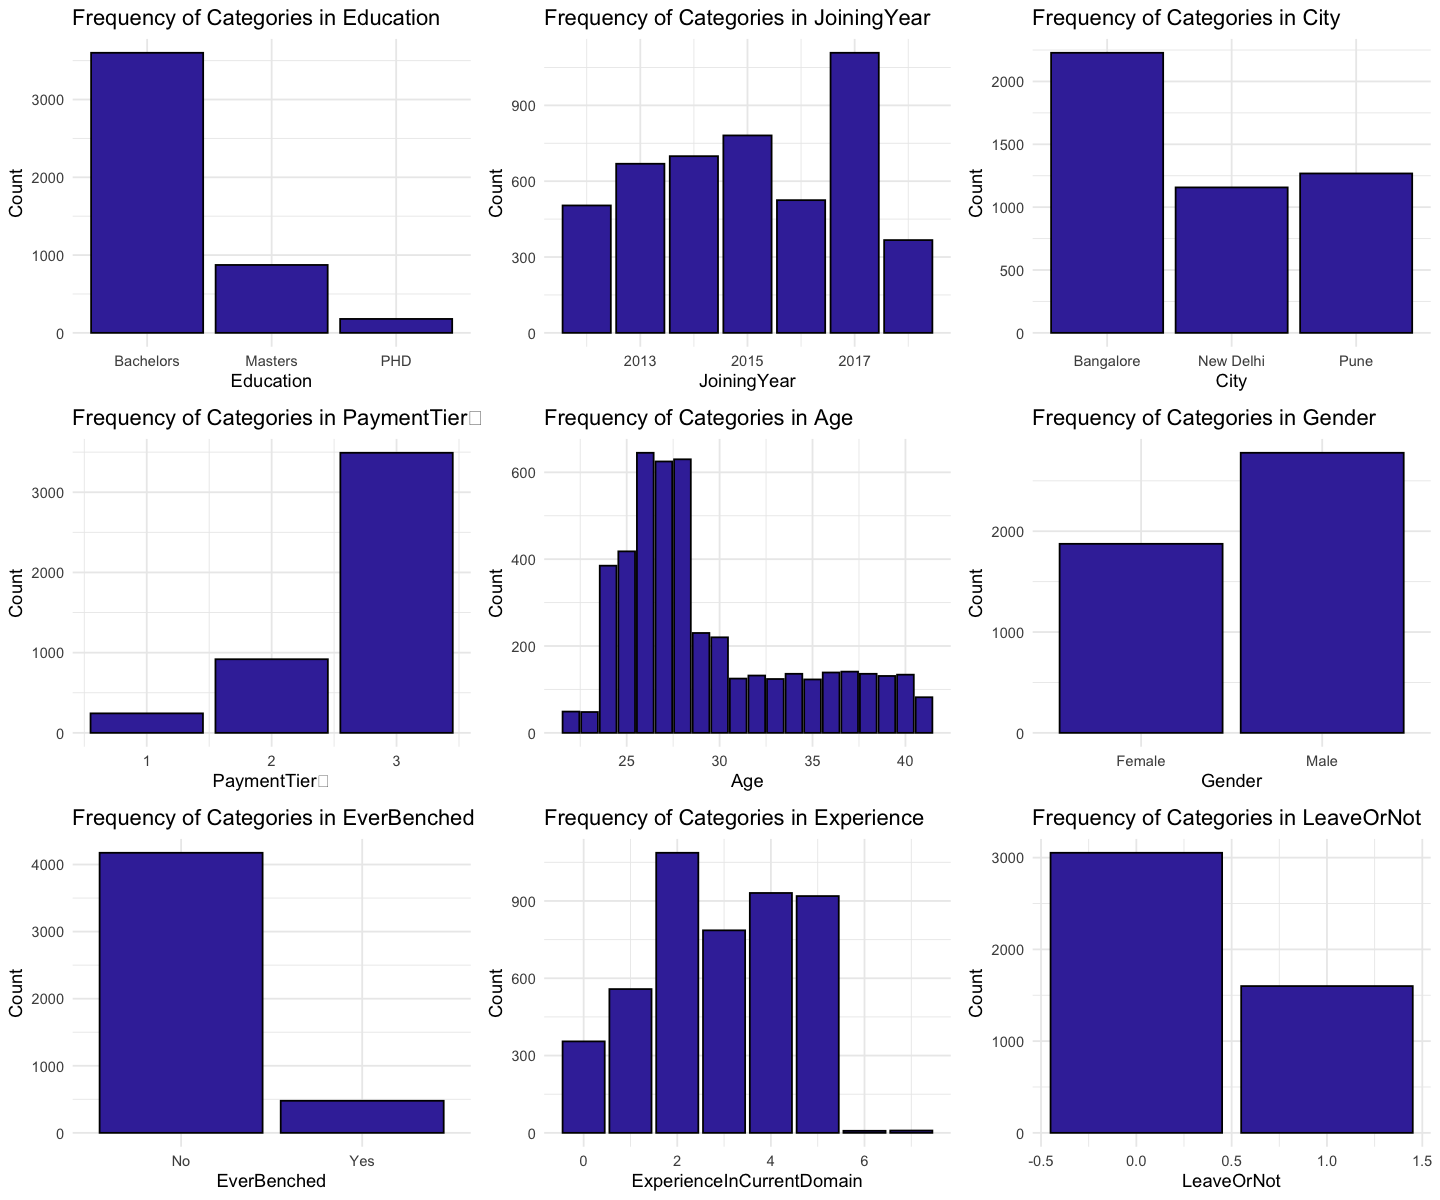

In [40]:
# Main developer: Name
# Contributor: 

options(repr.plot.width = 12, repr.plot.height = 10) 
plot_grid(plot1, plot2,plot3, plot4,plot5, plot6,plot7, plot8,plot9, ncol = 3,nrow = 3)

We observe there are much more employees who have not been benched than those who have.The distribution plot of the City shows that the majority of employees are based in Bangalore, with a similar distribution of employees between Pune and New Delhi. The distribution plot of the Age shows that most employees falls within the 20-30 age range. The distribution plot of the LeaveOrNot shows that a higher number of employees are likely to leave the company compared to those who are not. The distribution plot of the Gender shows that there are more male employees than female.
There are three payment tiers where employee count increases with payment tier number. From this, we can interpret payment tier 1 to rank the highest as it has fewer employees, followed by tier 2 and finally, tier 3 being the most common. Let us Payment tier with Education level to better understand the tiers.

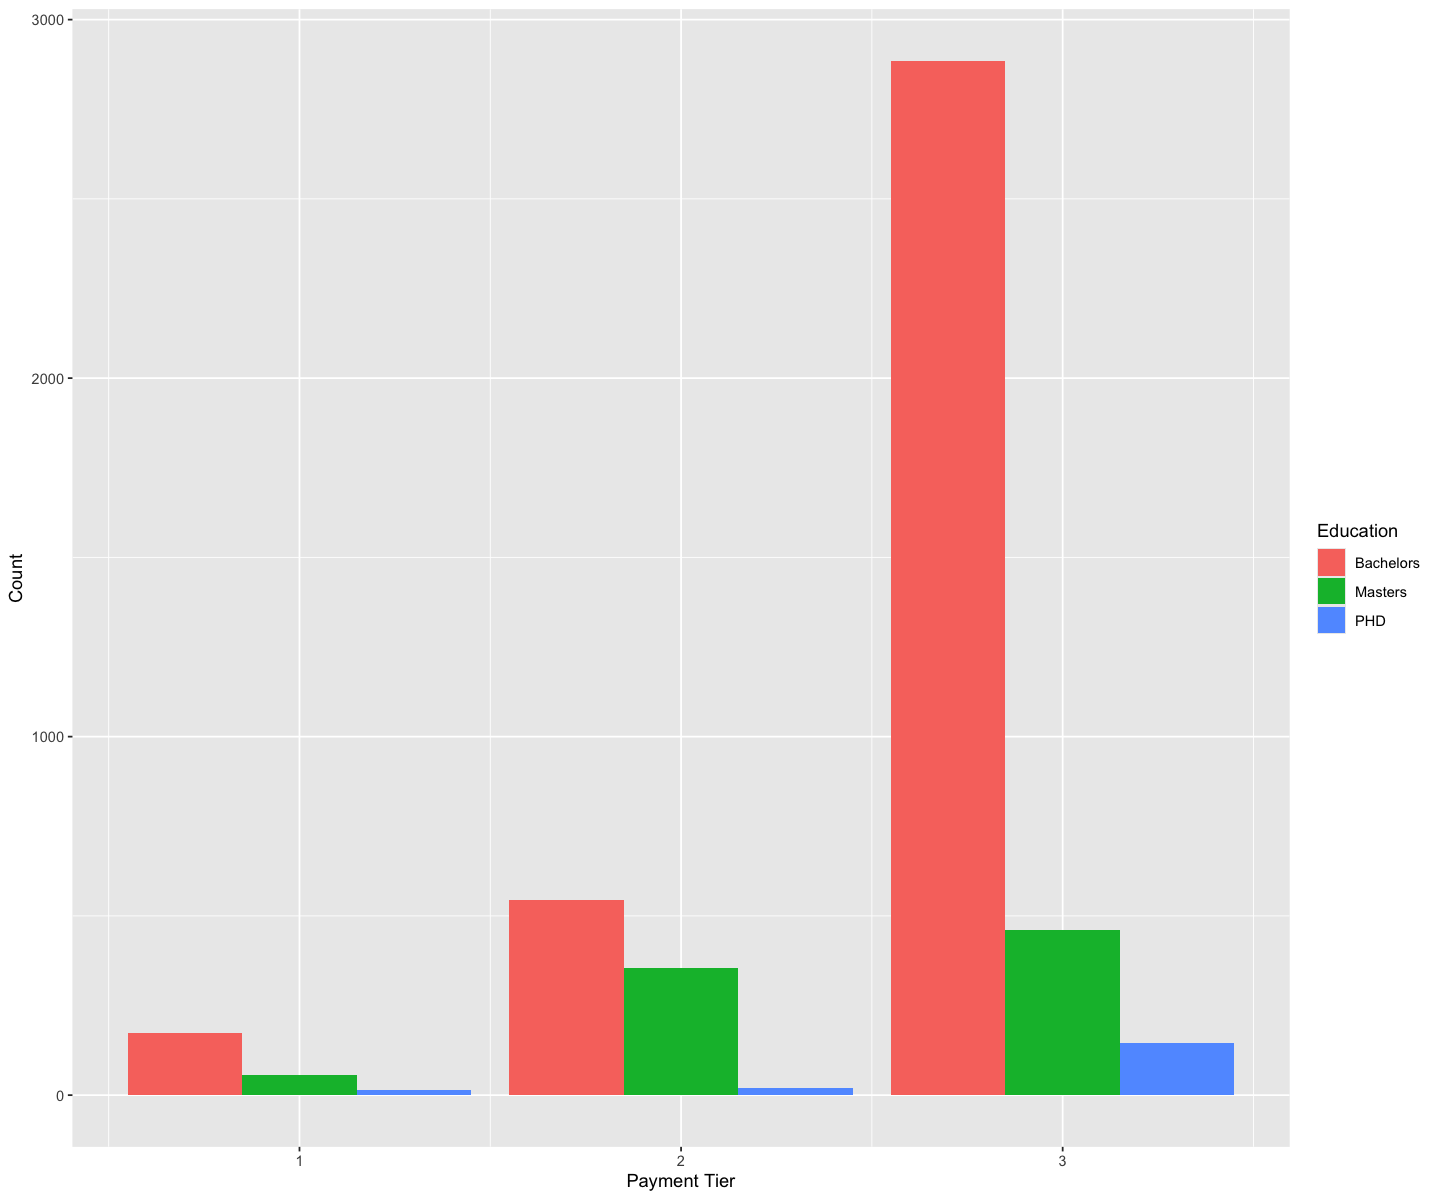

In [41]:
# Main developer: Nikita
# Contributor:

ggplot(employee_data, aes(x = PaymentTier, fill = Education)) +
  geom_bar(position = "dodge") +
  labs(
    x = "Payment Tier",
    y = "Count"
  )

Below is included with features plotted against our target variable, LeaveOrNot.

In [42]:
# Main developer: Nikita
# Contributor:

#Categorical variables
s_plot1<-ggplot(employee_data, aes(x = Education, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Education Level", 
       x = "Education Level", y = "Proportion of Employees") +
  theme_minimal()
s_plot2<-ggplot(employee_data, aes(x = City, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by City", 
       x = "City", y = "Proportion of Employees") +
  theme_minimal()
s_plot3<-ggplot(employee_data, aes(x = PaymentTier, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by PaymentTier", 
       x = "Payment Tier", y = "Proportion of Employees") +
  theme_minimal()
s_plot4<-ggplot(employee_data, aes(x = Gender, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Gender", 
       x = "Gender", y = "Proportion of Employees") +
  theme_minimal()
s_plot5<-ggplot(employee_data, aes(x = EverBenched, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Ever Benched", 
       x = "Ever Benched", y = "Proportion of Employees") +
  theme_minimal()
s_plot6<-ggplot(employee_data, aes(x = JoiningYear, fill = factor(LeaveOrNot))) +
  geom_bar(position = "fill") + 
  labs(title = "Proportion of Employees Who Will Stay or Leave by Joining Year", 
       x = "Joining Year(Years)", y = "Proportion of Employees") +
  theme_minimal()

#continous variables
b_plot1<-ggplot(employee_data, aes(x = LeaveOrNot, y = ExperienceInCurrentDomain,fill= factor(LeaveOrNot))) +
  geom_boxplot() +
  labs(title = "Experience vs LeaveOrNot",
       x = "LeaveOrNot",
       y = "Experience in Current Domain (Years)",
       fill = "LeaveOrNot") +
  theme_minimal() 
b_plot2<-ggplot(employee_data, aes(x = LeaveOrNot, y = Age,fill= factor(LeaveOrNot))) +
  geom_boxplot() +
  labs(title = "Age vs LeaveOrNot",
       x = "LeaveOrNot",
       y = "Age (Years)",
       fill = "LeaveOrNot") +
  theme_minimal() 
  

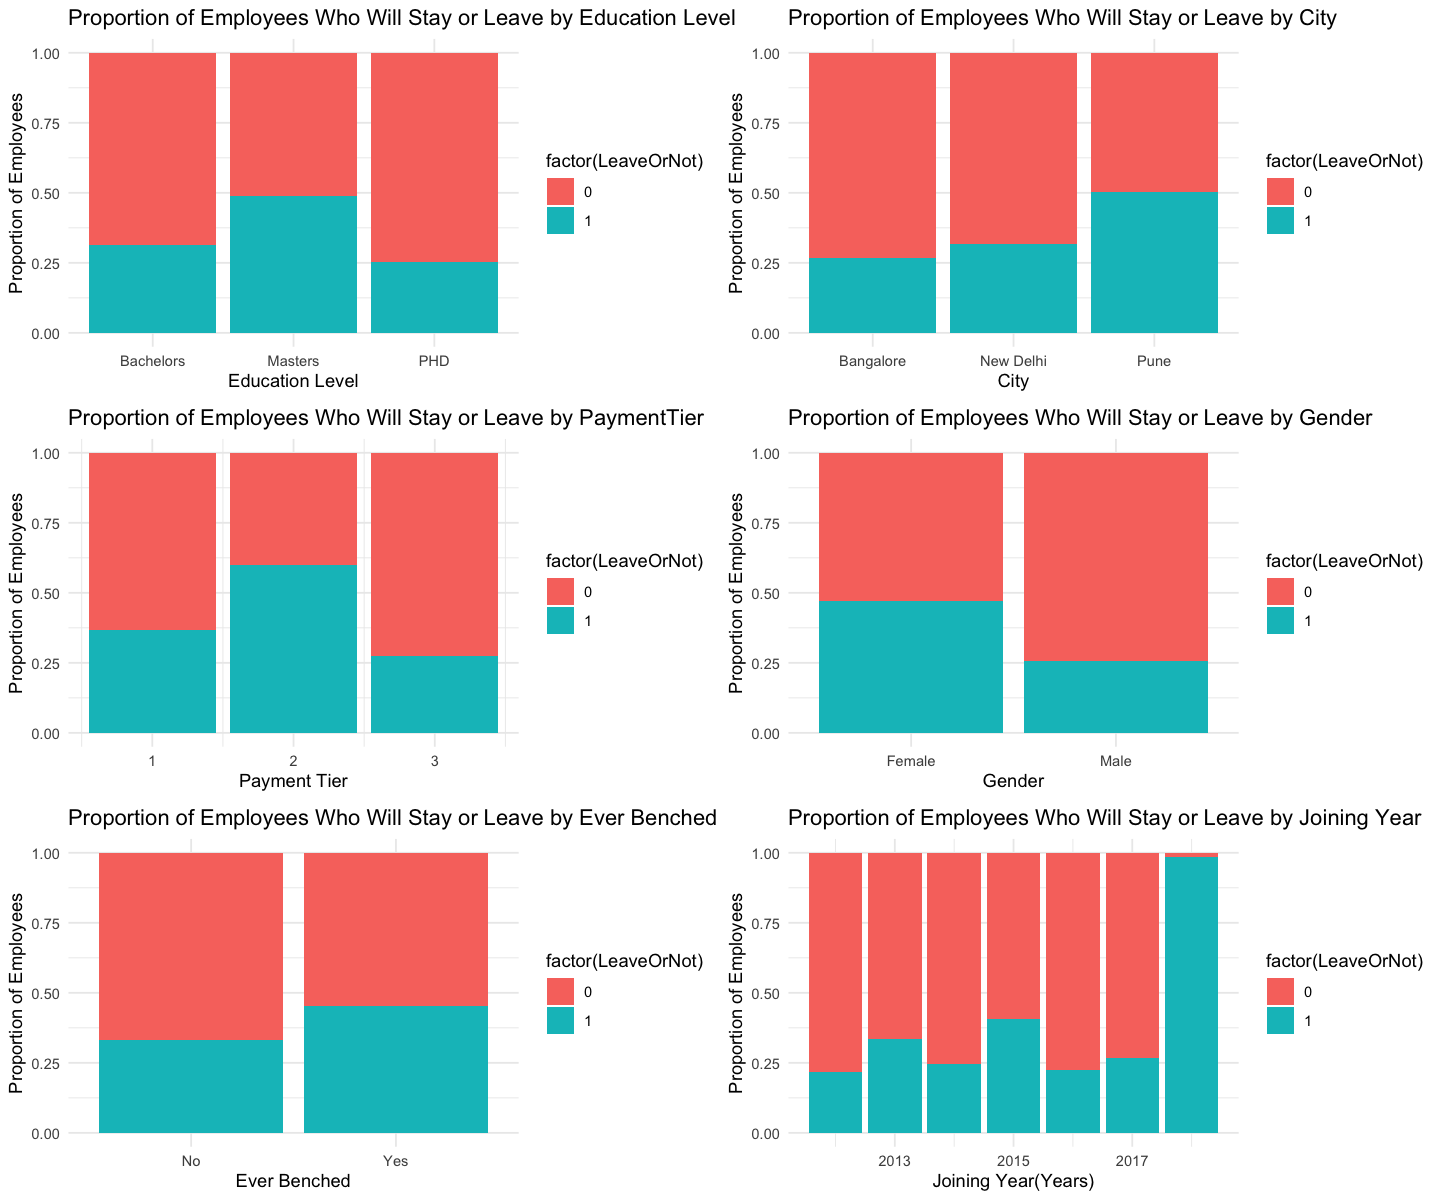

In [43]:
# options(repr.plot.width = 12, repr.plot.height = 10) 
plot_grid(s_plot1,s_plot2,s_plot3,s_plot4,s_plot5,s_plot6, ncol = 2,nrow = 3)

We observe from the plots that the proportion of employees who leave the company is generally higher for all variables. The proportion of employees staying or leaving differs between categories for all the categorical variables. Payment tier 2 has the highest proportion of employees staying, and payment 3 has the least proportion staying among the tiers. Female employees exhibit a higher proportion of staying with the company compared to their male counterparts. For employees who joined up to 2017, the proportion of employees staying was lower. However, from 2018 onwards, the trend shifted, and most employees tend to stay with the company. Employees based in Pune have the highest proportion of staying, and employees based in Bangalore have the lowest. Employees with a Master appear to have the highest proportion of employees who stay.

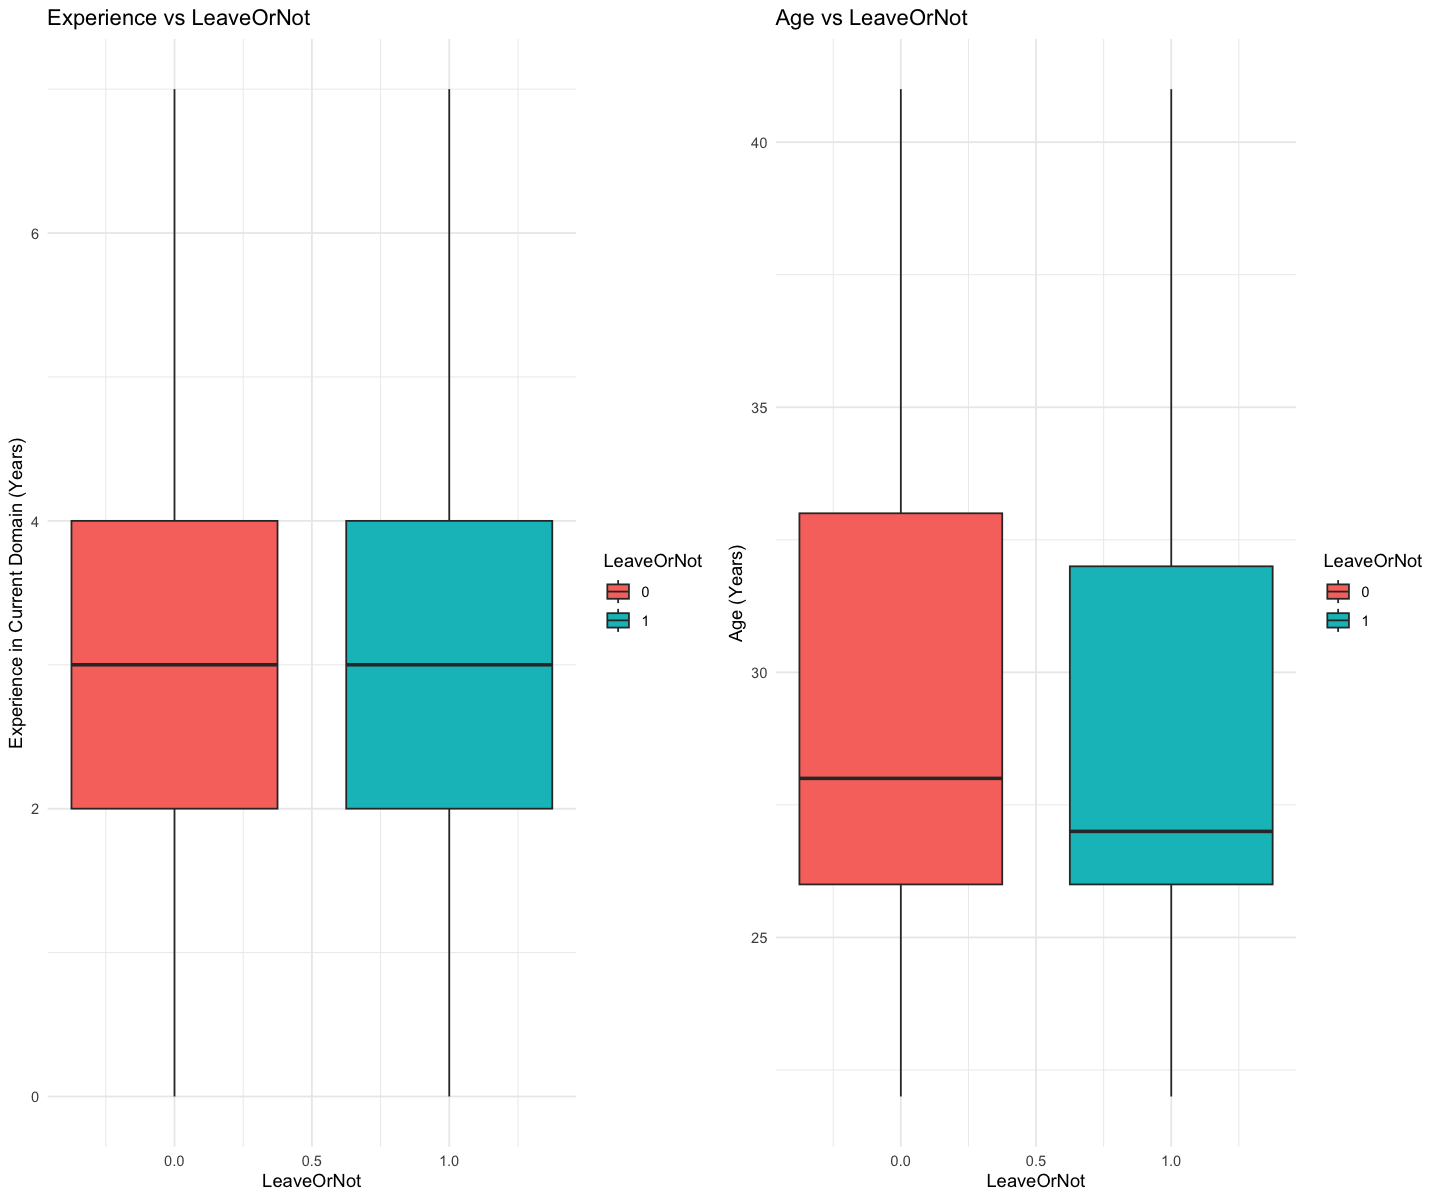

In [44]:
# Main developer: Nikita
# Contributor:

plot_grid(b_plot1,b_plot2, ncol = 2)

From the first boxplot, experience in the current domain does not seem to affect whether an employee leaves. On the other hand, age seems to affect if the employee stays. The median age for employees who leave the company is higher than that for employees who stay.

Now we must check for multicollinearity between the variables. This is to ensure if any of our explanatory variables are not highly correlated with each other.

In [45]:
# Main developer: 
# Contributor:

# Let us make the correlation matrix
employee_data_n <- employee_data %>%
    mutate(
        LeaveOrNot = as.numeric(LeaveOrNot)
    )|>
select(-Education,-JoiningYear,-City,-Gender,-EverBenched)

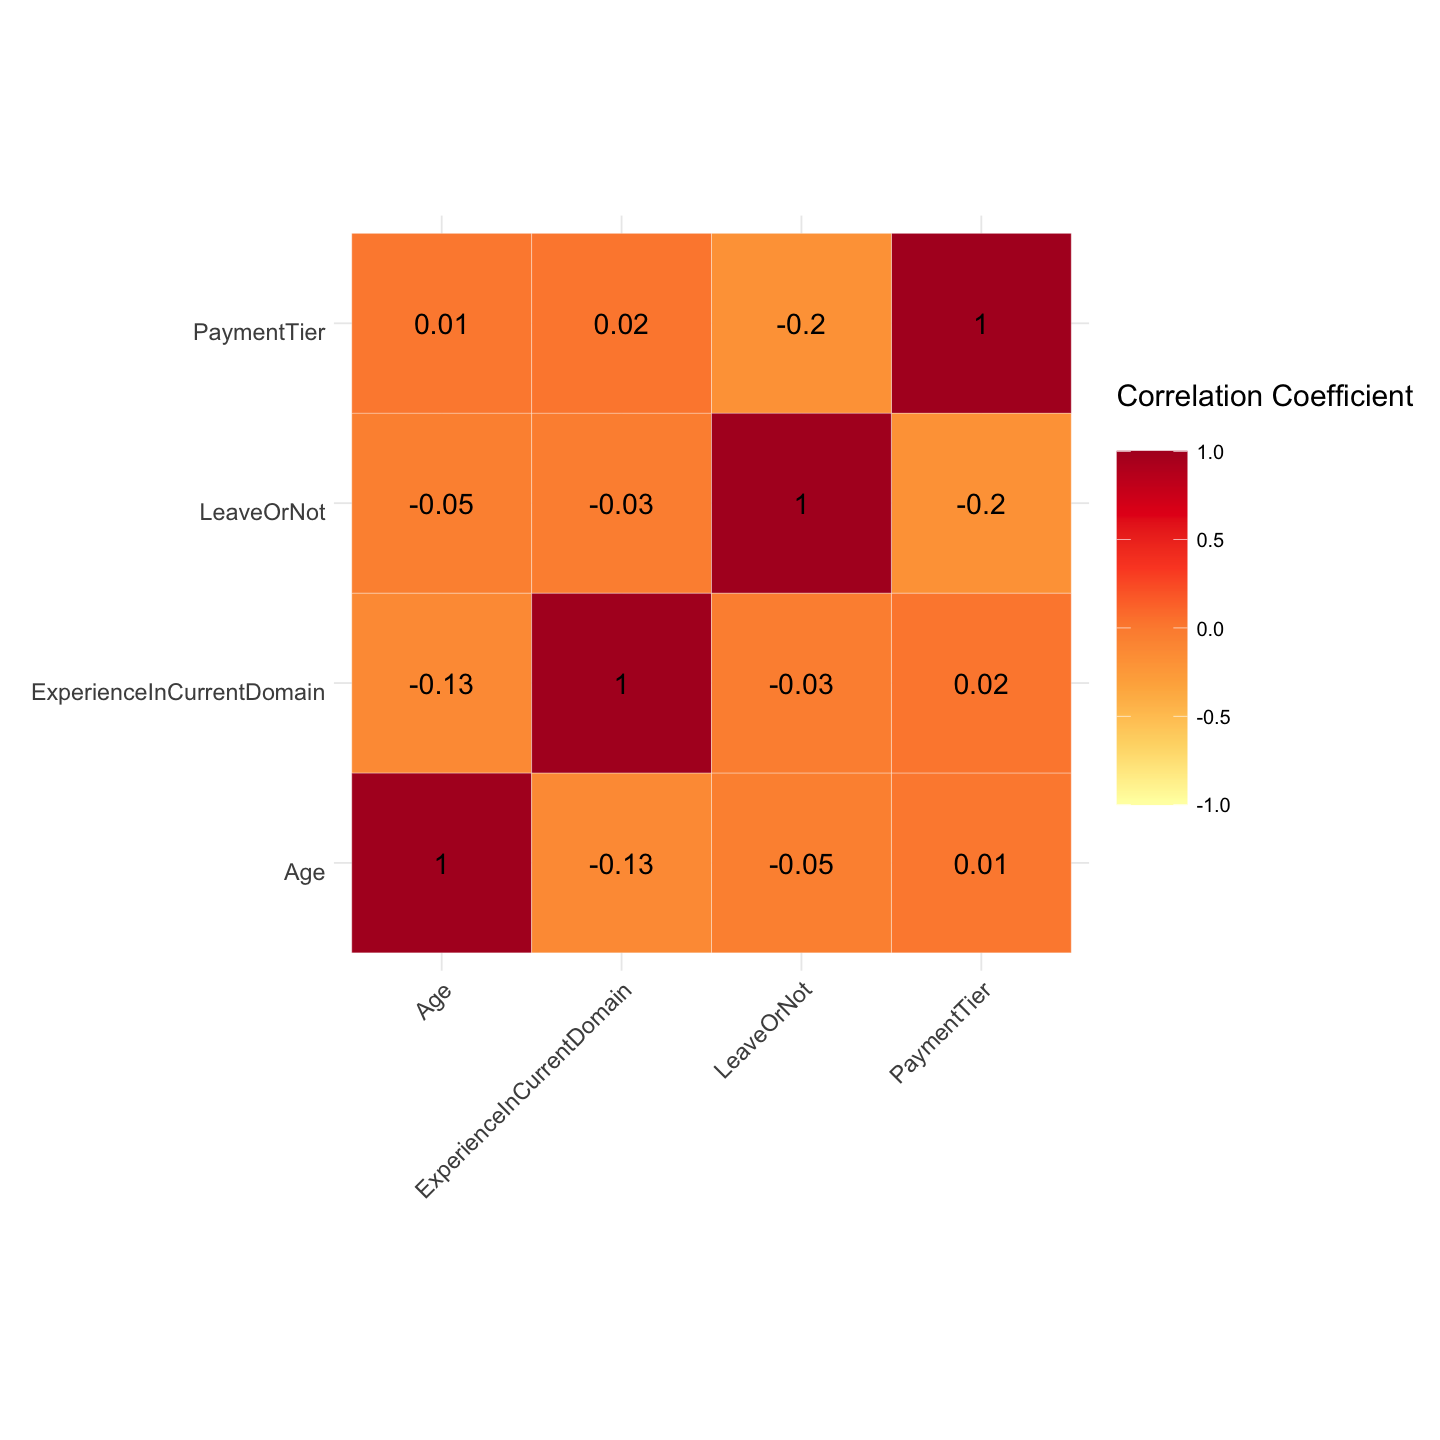

In [46]:
# Main developer: Name
# Contributor:

corr_matrix <- 
   employee_data_n %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")
# corr_matrix

options(repr.plot.width = 12, repr.plot.height = 12) 

plot_corr_matrix <- 
  corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette =  "YlOrRd",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "", y = "") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm")
    ) +
    coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)


plot_corr_matrix


We observe fairly low correlation between the variables. Looking at the correlation between LeaveOrNot and the other variables the correlation appears to be low.

# Methods: Plan

We will begin by splitting the data into training and testing sets. The training set is used to train our model and testing set will be used as an evaluation metric for the model we built. Feature selection with the backward selection algorithm will be implemented to optimize our model. Based on our results, we will be able to build our model with the condensed variables. 

We will be building a logistic regression model with our training set. Logistic Regression is appropriate as it is designed for modelling binary outcomes and specifically, we are trying to predict our target variable, LeaveOrNot, which is a binary categorical variable. Hence, by using logistic regression, we are able to model the probability of LeaveOrNot as a function of our predictor variables.

In [47]:
# Main developer: Name
# Contributor:

# Adjust data types
employee_data_f <- employee_data %>%
  mutate(
    Education = as.numeric(factor(Education)),
    JoiningYear = as.factor(JoiningYear),
    City = as.factor(City),
    Gender = as.factor(Gender),
    EverBenched = as.factor(EverBenched),
    LeaveOrNot = as.factor(LeaveOrNot)
  )

In [48]:
# Main developer: Name
# Contributor: Tracy

# code from tutorial 5
# split the data into training and test. 

set.seed(1223)

employee_sample <- 
    employee_data_f %>%
    mutate(id = row_number())

training_employee <- 
    employee_sample %>%
    slice_sample(prop = 0.7, replace = FALSE)

test_employee <- 
    employee_sample %>%
    anti_join(training_employee, by = "id")

training_employee <- 
    training_employee |>
    select(-id) 

test_employee <- 
    test_employee %>% 
    select(-id)

head(training_employee)
nrow(training_employee)

head(test_employee)
nrow(test_employee)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,2017,New Delhi,2,27,Female,No,5,0
2,2017,New Delhi,2,28,Male,No,2,0
1,2018,Bangalore,3,28,Male,No,2,1
1,2012,Bangalore,3,31,Male,No,3,0
1,2014,Pune,2,29,Female,No,2,1
1,2015,Bangalore,3,24,Male,Yes,2,1


[1] 3257

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,2017,Bangalore,3,34,Male,No,0,0
1,2013,Pune,1,28,Female,No,3,1
1,2014,New Delhi,3,38,Female,No,2,0
2,2017,New Delhi,2,37,Male,No,2,0
1,2016,Pune,3,34,Male,No,3,0
1,2018,Pune,3,32,Male,Yes,5,1


[1] 1396

### Feature selection using backward selection

In [58]:
# Main developer: Name
# Contributor:

#split the training data into training and selection.
set.seed(1223)
training_sample <- 
    training_employee %>%
    mutate(id = row_number())

selection_employee <- 
    training_sample %>%
    slice_sample(prop = 0.7, replace = FALSE)

train_employee <- 
    training_sample %>%
    anti_join(selection_employee, by = "id")

train_employee <- 
    train_employee |>
    select(-id) 

selection_employee <- 
    selection_employee %>% 
    select(-id)

head(train_employee)
nrow(train_employee)

head(selection_employee)
nrow(selection_employee)

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,2017,New Delhi,2,27,Female,No,5,0
1,2015,Bangalore,3,24,Male,Yes,2,1
1,2014,Bangalore,1,28,Female,No,2,0
1,2013,Pune,2,27,Female,No,5,1
1,2012,Bangalore,3,29,Female,No,1,0
2,2017,New Delhi,3,41,Female,No,2,0


[1] 978

Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>
1,2013,New Delhi,2,25,Female,No,3,1
2,2018,Pune,3,28,Male,No,2,1
1,2017,Bangalore,3,35,Female,No,5,0
1,2012,Bangalore,3,36,Male,No,1,1
1,2014,Bangalore,3,26,Male,No,4,0
1,2014,Bangalore,3,27,Female,No,5,0


[1] 2279

In [50]:
# Main developer: Name
# Contributor: 

#backward selection to select variables
backward_sel <- regsubsets(
  x=LeaveOrNot ~ ., 
  nvmax=14,
  data=selection_employee,
  method="backward",
)

bwd_summary <- summary(backward_sel)
bwd_summary$which
bwd_summary_df <- 
    tibble(
        n_input_variables = 1:14,
        BIC = bwd_summary$bic,
        Cp = bwd_summary$cp
    )
bwd_summary_df

,(Intercept),Education,JoiningYear2013,JoiningYear2014,JoiningYear2015,JoiningYear2016,JoiningYear2017,JoiningYear2018,CityNew Delhi,CityPune,PaymentTier,Age,GenderMale,EverBenchedYes,ExperienceInCurrentDomain
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
3,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE
4,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
5,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
6,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE
7,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE
8,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
9,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE
10,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


n_input_variables,BIC,Cp
<int>,<dbl>,<dbl>
1,-351.6459,514.22901
2,-525.0904,303.07573
3,-660.2666,148.50000
4,-737.3232,62.13857
5,-749.9063,43.45161
6,-760.8999,26.54586
7,-759.8394,21.84798
8,-758.1089,17.83942
9,-756.6513,13.57468


We will use Mallow's Cp statistic and BIC(Bayesian Information Criterion) to help choose our model. Let us choose the model with p covariates, which minimizes Cp. So, the model with the 10 selected variables seems the most suitable. Based on BIC, we would prefer a model with the lowest BIC. The model with 6 selected variables seems the most suitable. Let us compare them. 

In [51]:
# Main developer: Name
# Contributor: 

cp_min = which.min(bwd_summary$cp) 
selected_var_cp <- names(coef(backward_sel, cp_min))[-1]
selected_var_cp

bic_min = which.min(bwd_summary$bic) 
selected_var_bic <- names(coef(backward_sel, bic_min))[-1]
selected_var_bic

[1] "Education"       "JoiningYear2013" "JoiningYear2015" "JoiningYear2017"
 [5] "JoiningYear2018" "CityPune"        "PaymentTier"     "Age"            
 [9] "GenderMale"      "EverBenchedYes"

[1] "JoiningYear2013" "JoiningYear2015" "JoiningYear2018" "CityPune"       
[5] "PaymentTier"     "GenderMale"

Based on the first model, Education, Joining Year, City, Payment Tier, Age, Gender, and Experience in the Current Domain are the appropriate covariates. For categorical variables like Gender, Joining Year, and City, we include the entire variable rather than individual levels. The backward selection model automatically includes the levels of these variables by creating dummy variables and treating them as individual covariates. For such cases, let us model them using the covarites and let us check the significance of each level.

In [52]:
# Main developer: Name
# Contributor: 

# model prioritizing Cp
leave_or_not_bwd1 <- 
  glm(formula =LeaveOrNot~Education+JoiningYear+City+PaymentTier+Age+Gender+EverBenched,
      data = train_employee,
      family = binomial)
summary(leave_or_not_bwd1)


Call:
glm(formula = LeaveOrNot ~ Education + JoiningYear + City + PaymentTier + 
    Age + Gender + EverBenched, family = binomial, data = train_employee)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      1.22875    0.72829   1.687 0.091571 .  
Education        0.25702    0.16784   1.531 0.125691    
JoiningYear2013  0.32980    0.31095   1.061 0.288853    
JoiningYear2014  0.23543    0.31271   0.753 0.451525    
JoiningYear2015  0.34144    0.30686   1.113 0.265843    
JoiningYear2016 -0.03705    0.33808  -0.110 0.912726    
JoiningYear2017 -0.01265    0.29975  -0.042 0.966328    
JoiningYear2018  5.87473    1.04277   5.634 1.76e-08 ***
CityNew Delhi   -0.51739    0.23244  -2.226 0.026019 *  
CityPune         0.68052    0.19233   3.538 0.000403 ***
PaymentTier     -0.62923    0.15018  -4.190 2.79e-05 ***
Age             -0.02120    0.01676  -1.265 0.205818    
GenderMale      -0.72436    0.16747  -4.325 1.52e-05 ***
EverBenchedYes  -0.30457    0.3

In [53]:
# Main developer: Name
# Contributor: 

# model prioritizing BIC
leave_or_not_bwd2 <- 
  glm(formula =LeaveOrNot~JoiningYear+City+PaymentTier+Gender,
      data = train_employee,
      family = binomial)
summary(leave_or_not_bwd2)


Call:
glm(formula = LeaveOrNot ~ JoiningYear + City + PaymentTier + 
    Gender, family = binomial, data = train_employee)

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      0.91181    0.50057   1.822 0.068524 .  
JoiningYear2013  0.33569    0.31044   1.081 0.279554    
JoiningYear2014  0.24628    0.31246   0.788 0.430568    
JoiningYear2015  0.33948    0.30459   1.115 0.265049    
JoiningYear2016 -0.09033    0.33659  -0.268 0.788410    
JoiningYear2017  0.01749    0.29627   0.059 0.952934    
JoiningYear2018  5.86081    1.03790   5.647 1.63e-08 ***
CityNew Delhi   -0.39643    0.22076  -1.796 0.072533 .  
CityPune         0.72660    0.19066   3.811 0.000138 ***
PaymentTier     -0.65496    0.14901  -4.395 1.11e-05 ***
GenderMale      -0.69475    0.16605  -4.184 2.86e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1247.78  on 977  degrees of free

In both models, only JoiningYear2018 remains significant among the levels. JoiningYear may not be an important predictor, but JoiningYear2018 is statistically significant, so we decided to keep it. We will compare these models with the full model and each other. We will also check each model without JoiningYear compared to the full model.

In [54]:
# Main developer: Name
# Contributor: Tracy

# prediction for model 1 (model that prioritizes Cp)

pred_class_bw1 <- round(predict(leave_or_not_bwd1, newdata= test_employee,type= "response"),0)

bw1_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(pred_class_bw1),
    reference = as.factor(test_employee$LeaveOrNot),
    positive = '1'
)

bw1_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 893 234
         1  44 225
                                          
               Accuracy : 0.8009          
                 95% CI : (0.7789, 0.8215)
    No Information Rate : 0.6712          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4956          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4902          
            Specificity : 0.9530          
         Pos Pred Value : 0.8364          
         Neg Pred Value : 0.7924          
             Prevalence : 0.3288          
         Detection Rate : 0.1612          
   Detection Prevalence : 0.1927          
      Balanced Accuracy : 0.7216          
                                          
       'Positive' Class : 1               
                              

In [55]:
# Main developer: Name
# Contributor: Tracy

# prediction for model 2 (model that prioritizes BIC)

pred_class_bw2 <- round(predict(leave_or_not_bwd2, newdata= test_employee,type= "response"),0)

bw2_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(pred_class_bw2),
    reference = as.factor(test_employee$LeaveOrNot),
    positive = '1'
)

bw2_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 896 230
         1  41 229
                                          
               Accuracy : 0.8059          
                 95% CI : (0.7841, 0.8263)
    No Information Rate : 0.6712          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5086          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4989          
            Specificity : 0.9562          
         Pos Pred Value : 0.8481          
         Neg Pred Value : 0.7957          
             Prevalence : 0.3288          
         Detection Rate : 0.1640          
   Detection Prevalence : 0.1934          
      Balanced Accuracy : 0.7276          
                                          
       'Positive' Class : 1               
                              

In [56]:
# Main developer: Name
# Contributor: Tracy

# prediction for full model
full_model <- 
  glm(formula =LeaveOrNot~.,
      data = train_employee,
      family = binomial)

pred_class_full <- round(predict(full_model, newdata= test_employee,type= "response"),0)

bw1_confusion_matrix <- 
    confusionMatrix(
    data = as.factor(pred_class_full),
    reference = as.factor(test_employee$LeaveOrNot),
    positive = '1'
)

bw1_confusion_matrix

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 890 230
         1  47 229
                                          
               Accuracy : 0.8016          
                 95% CI : (0.7797, 0.8222)
    No Information Rate : 0.6712          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4996          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.4989          
            Specificity : 0.9498          
         Pos Pred Value : 0.8297          
         Neg Pred Value : 0.7946          
             Prevalence : 0.3288          
         Detection Rate : 0.1640          
   Detection Prevalence : 0.1977          
      Balanced Accuracy : 0.7244          
                                          
       'Positive' Class : 1               
                              

### Regularization

# Discussion

#### Summary of Findings and Implications 
The analysis explored factors associated with employee retention using logistic regression. Significant predictors for whether an employee leaves or stays with the company included *Education*, *Joining Year*, *City*, *Payment Tier*, *Age*, *Gender*, and *Ever Benched* status. Key observations include:

- Age: Younger employees (20-30 years) are more likely to leave, suggesting that career growth or other opportunities might be attractive for this demographic, or just a current trend in youngsters to switch between companies.
  
- City: Employees in Pune had a higher likelihood of staying, possibly reflecting regional differences in work culture or job availability.


- Gender: Female employees demonstrated slightly higher retention rates, potentially reflecting satisfaction with workplace policies.

  
- Payment Tier: Employees in payment tier 2 have a higher retatention rate ,while employees in payment tier 3 surprisingly were the most likely to leave. This suggests that individuals in higher-paying roles might be more attractive to the industry, offering them greater career mobility and options due to their expertise and salary levels.

- Education: Employees with a Master's degree were more likely to stay with the company, while those holding a PhD were more inclined to leave. This trend appears to be connected to payment tiers, as individuals with higher levels of education, such as PhDs, might expect greater compensation or career opportunities elsewhere, potentially leading to a higher rate of turnover. On the other hand, Master's degree holders may find their current positions more aligned with their expectations and career goals, contributing to better retention.


- Joining Year: Employees who joined before 2018 had a higher likelihood of leaving,  and those who joined after tend to stay with the company. This suggests a possible shift in company culture or policies improving retention in later years.

The final model achieved around 80% prediction accuracy, which underscores the model's robust ability to differentiate between employees likely to stay or leave. This strong performance was consistent across different variable selection methods (Cp, BIC and full model), indicating that the chosen predictors reliably influence retention.

  
These findings are crucial for tailoring retention strategies, such as focusing on younger employees for engagement programs, providing competitive pay, and addressing location-specific challenges.


#### Alignment with Expectations
The results were mostly aligned with expectations, but there was unexpected findings regarding payment tiers, city as well as gender and employee retention.

- Payment Tier and Retention: Contrary to the intuitive notion that higher payment tiers correlate with higher retention, the analysis revealed that employees in payment tier 3 were more likely to leave. This was surprising, as a previous study (Sorn, Fienena, Ali, Rafay, & Fu, 2023) suggest that higher payment tiers are typically associated with increased job satisfaction and retention. This article highlights that competitive pay is a strong predictor of employee retention, with those in higher-paying roles often staying longer. However, the result in this analysis suggests that employees in higher payment tiers might be more sought after by the industry, having more opportunities elsewhere due to their experience and skillset, leading them to leave for better offers. This warrants further exploration to understand the dynamics better.
  
- Regional Differences in Retention: The unexpected finding that employees in Pune had higher retention rates points to potential regional differences in workplace culture, job availability, or economic factors. Further investigation into these regional dynamics could shed light on how location impacts employee loyalty and retention.

- Gender and Retention: The observation that female employees had slightly higher retention rates was also surprising, as it contrasts with broader industry trends, where gender retention gaps often favor male employees. This could indicate that the company's workplace policies may be more supportive of female employees, contributing to higher satisfaction and retention. Further analysis of company policies and practices would be helpful to understand this trend fully.

#### Improvements
A potential improvement that can be made to our model is addressing the class imbalance by applying certain techniques to our dataset to either increase the minority class or decrease the majority class. As seen in our EDA, the Education variable faces class imbalance where there are much more Employees with a Bachelors education compared to Masters or PHD. This poses a challenge as our model might have become biased towards employees with the highest education level of Bachelors. Moreover, for employees with Masters and PHD, the model might have not learned meaningful patterns in the data due to lack of examples, hence underfitting of the model for employees with those education categories.

Another potential improvement that can be made to our model is including the interaction term of certain covariates in our dataset. Although our EDA is quite extensive, we did not cover all combinations. This limitation means that we might have overlooked cases where the effect of a variable is dependent on another variable. Being able to point out this dependency and include it as an interaction term may have improved our model.

#### Future Questions

From our model, several future research questions for exploration arises, such as 
* Can the model accurately predict long-term turnover patterns in this company?
* Will the model be able to generalize well to the entire population?
* How do external factors like economic conditions or how well a company is performing can impact employee turnover?

## Citations
1. Elmetwally, T. (2020). Employee dataset [Data set]. Kaggle. https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/data
2. Sorn, M.K., Fienena, A.R.L., Ali, Y., Rafay, M. and Fu, G.H. (2023) The Effectiveness of Compensation in Maintaining Employee Retention. Open Access Library Journal, 10, 1-14. doi: 10.4236/oalib.1110394.